# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

In [3]:
life_type_df = pd.DataFrame()

df1            = pd.DataFrame({'Type': 'A', 'Life_hours':life_type_A})
df2            = pd.DataFrame({'Type': 'B', 'Life_hours':life_type_B})
df3            = pd.DataFrame({'Type': 'C', 'Life_hours':life_type_C})

life_type_df = life_type_df.append(df1) 
life_type_df = life_type_df.append(df2) 
life_type_df = life_type_df.append(df3) 

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

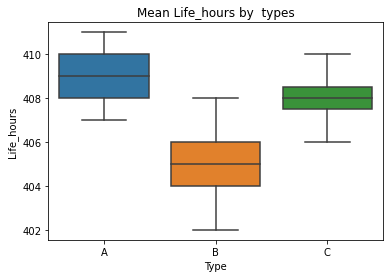

In [4]:
sns.boxplot(x = "Type", y = "Life_hours", data = life_type_df)
plt.title('Mean Life_hours by  types')
plt.show()

The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [5]:
import scipy.stats             as     stats

In [6]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 9)
print('F critical value for 2 and 9 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 9 df with .95 confidence 4.26


In [7]:
p_value = 1 -stats.f.cdf(4.5, dfn = 2, dfd = 9)
print('P value for 2 and 9 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 9 df with .95 confidence for the calculated F value 0.04419


In [8]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Life_hours ~ Type', data = life_type_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

          sum_sq   df    F    PR(>F)
Type        36.0  2.0  4.5  0.044194
Residual    36.0  9.0  NaN       NaN


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In this example, p value is 0.044194 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

## So there is sufficient evidence to reject the null hypothesis that there IS ATLEAST ONE

### difference in the average lifetimes of the three TYPES.

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(life_type_df['Life_hours'],life_type_df['Type']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     -4.0 0.0541 -8.0746 0.0746  False
     A      C     -1.0 0.7824 -5.2613 3.2613  False
     B      C      3.0 0.1177 -0.7427 6.7427  False
---------------------------------------------------


### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [10]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [11]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


In [12]:
d0_val  = df1['Day'].values
d1_val  = df1['Store-A'].values
d2_val  = df1['Store-B'].values
d3_val  = df1['Store-C'].values
d4_val  = df1['Store-D'].values
d5_val  = df1['Store-E'].values

In [13]:
df1     = pd.DataFrame({'Day': d0_val, 'Store':'A', 'QoS': d1_val})
df2     = pd.DataFrame({'Day': d0_val, 'Store':'B', 'QoS': d2_val})
df3     = pd.DataFrame({'Day': d0_val, 'Store':'C', 'QoS': d3_val})
df4     = pd.DataFrame({'Day': d0_val, 'Store':'D', 'QoS': d4_val})
df5     = pd.DataFrame({'Day': d0_val, 'Store':'E', 'QoS': d5_val})

QoS_df  = pd.DataFrame()

QoS_df  = QoS_df.append(df1) 
QoS_df  = QoS_df.append(df2) 
QoS_df  = QoS_df.append(df3) 
QoS_df  = QoS_df.append(df4) 
QoS_df  = QoS_df.append(df5) 


pd.DataFrame(QoS_df)

,Day,Store,QoS
0,1,A,69
1,2,A,68
2,3,A,71
3,4,A,70
4,5,A,60
0,1,B,71
1,2,B,76
2,3,B,77
3,4,B,73
4,5,B,64


In [14]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'QoS ~ C(Day) + C(Store)'
model = ols(formula, QoS_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

          sum_sq    df         F    PR(>F)
C(Day)    617.36   4.0  8.737051  0.000614
C(Store)  461.76   4.0  6.534956  0.002575
Residual  282.64  16.0       NaN       NaN


In this example, 
* p value for Day is 0.000614 and < 0.05 so we reject the null hypothesis (1) 
and conclude that the Day is having an effect on Quality of Service.
* p value for Stores is 0.002575 and < 0.05 so we retain the null hypothesis (2) 
and conclude that the Stores is having an effect on Quality of Service.

## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [17]:
import scipy.stats as stats
import scipy

observed_values    = np.array([190, 185, 90, 35])
n                  = observed_values.sum()


In [18]:
expected_values    = np.array([n*0.28, n*.42, n*0.25, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0000001


### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [19]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [20]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(churn_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 2.77998 P value 0.249078 Degrees of freedom 2


### In this example, p value is 0.249078 and > 0.05 so we wont reject the null hypothesis. 

## E N D  